<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Diego Roberto Arancibia Delgado</h3>



In [28]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [29]:
# Mount Google Drive
# drive.mount('/content/drive')

In [30]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [31]:
data = pd.read_csv('smoke_detection_iot.csv', delimiter=",")

data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [32]:

# Paso 1: Eliminar columnas innecesarias
data = data.drop(['Unnamed: 0'], axis=1)
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Eliminar las columnas 'CustomerId' y 'Surname'



In [33]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [34]:
scaled_data

array([[-0.53394841,  0.28062169,  0.99494707, ..., -0.07388861,
        -1.38347572, -1.58245641],
       [-0.53393932,  0.2816663 ,  0.91711549, ..., -0.07388861,
        -1.38334411, -1.58245641],
       [-0.53393022,  0.28264127,  0.83702792, ..., -0.07388861,
        -1.38321249, -1.58245641],
       ...,
       [ 3.07252608,  0.20171901, -3.68848353, ..., -0.07387569,
        -0.62786328, -1.58245641],
       [ 3.07253518,  0.21676136, -3.66592365, ..., -0.07387569,
        -0.62773167, -1.58245641],
       [ 3.07254427,  0.23180371, -3.61177995, ..., -0.07387569,
        -0.62760005, -1.58245641]])

In [35]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [36]:
kmeans.cluster_centers_

array([[-0.27859248, -0.13961044,  0.33422311, -0.13480334, -0.11280585,
         0.09457824, -0.23504271,  0.30978786, -0.10713771, -0.09241627,
        -0.11237838, -0.09107231, -0.07384928,  0.47015879,  0.63162447],
       [ 1.15838354,  0.3253853 , -2.42271048,  6.02224731,  6.73539395,
        -5.39284532, -4.84102845, -2.16841496,  9.17997786,  8.30123218,
         9.18358585,  8.21179663,  7.00525753, -0.83748412, -1.16033921],
       [ 0.62204953,  0.32062303, -0.71023831,  0.11052254,  0.03334621,
        -0.03682347,  0.72771642, -0.66100355, -0.06538309, -0.06974322,
        -0.05304747, -0.06981999, -0.06869715, -1.08875323, -1.46143263]])

In [37]:
import numpy as np

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[ 3.06399894 -0.79135444 -2.33827485 -0.18857486 -0.14167861  2.05733569
   1.58774229 -1.34049824 -0.10819781 -0.09293058 -0.11396298 -0.09154855
  -0.07387108 -0.75131991 -1.58245641]
 [-0.39774131 -0.18959092  0.44448605 -0.11278942 -0.12593777 -0.25858249
  -0.47949784  0.13922177 -0.1070813  -0.09238411 -0.1122868  -0.0910451
  -0.073848    0.58853981  0.63192894]
 [-0.13117248  0.6483235   0.11849582 -0.09537925 -0.1327588  -0.25858249
  -0.52379585  0.10992782 -0.10726558 -0.09247519 -0.11256108 -0.09112728
  -0.07385169  0.76108952  0.63192894]
 [-0.07706418  0.59887875  0.54149353 -0.07630487 -0.14167861  0.07907912
  -0.59926652  0.04007302 -0.10696206 -0.09232845 -0.11211332 -0.09099273
  -0.07384523  1.54447312  0.63192894]]
Predicciones de cluster para las nuevas muestras:
[2 0 0 0]


<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

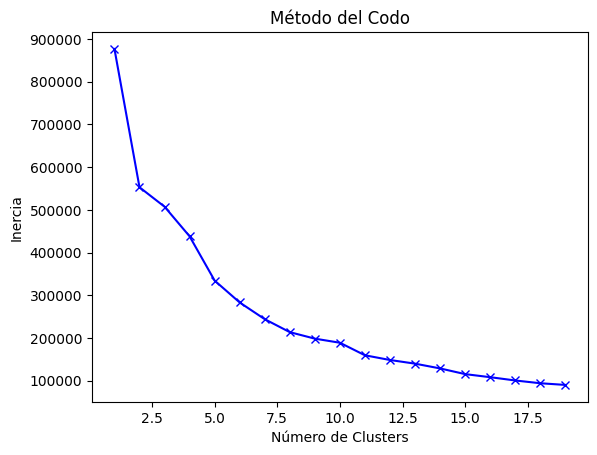

El número óptimo de clusters según el método del codo es: 19


In [38]:
import numpy as np
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster
print("El número óptimo de clusters según el método del codo es:", best_num_clusters_codo)



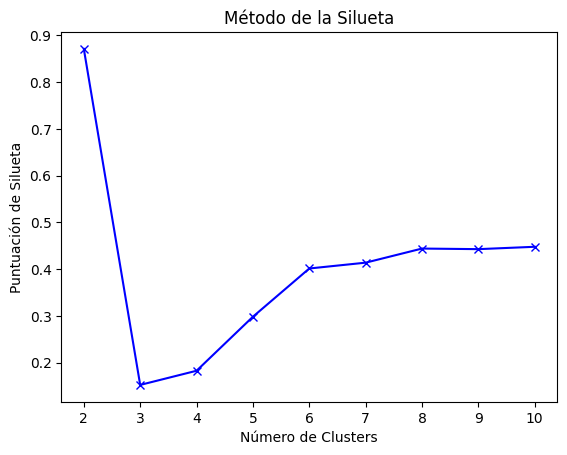

El número óptimo de clusters según la puntuación de silueta es: 2


In [39]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


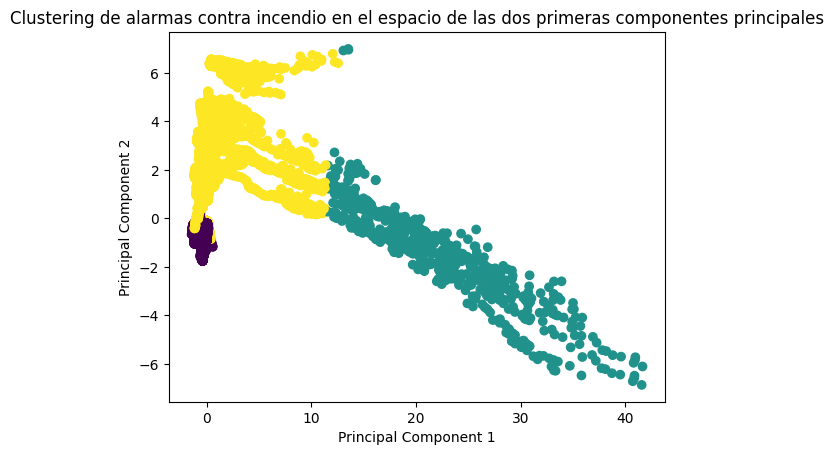

In [40]:
# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de alarmas contra incendio en el espacio de las dos primeras componentes principales')
plt.show()


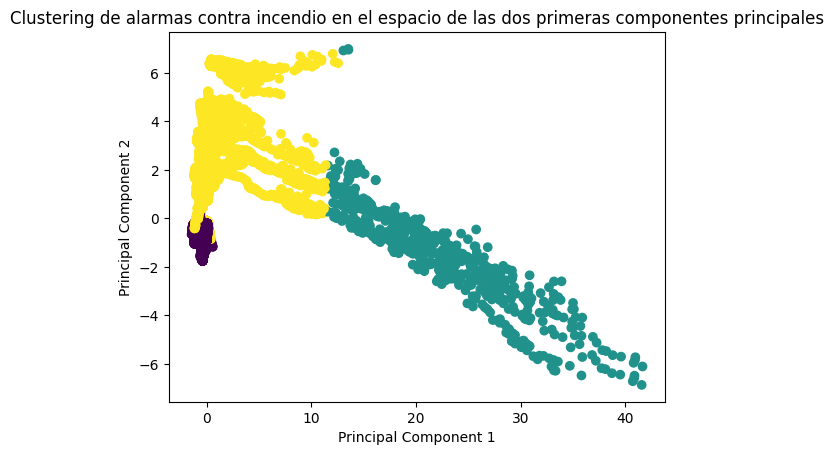

In [41]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de alarmas contra incendio en el espacio de las dos primeras componentes principales')
plt.show()

In [42]:
none_y

array([[-0.53394841,  0.28062169,  0.99494707, ..., -0.09192422,
        -0.07388861, -1.38347572],
       [-0.53393932,  0.2816663 ,  0.91711549, ..., -0.09192422,
        -0.07388861, -1.38334411],
       [-0.53393022,  0.28264127,  0.83702792, ..., -0.09192422,
        -0.07388861, -1.38321249],
       ...,
       [ 3.07252608,  0.20171901, -3.68848353, ..., -0.09164563,
        -0.07387569, -0.62786328],
       [ 3.07253518,  0.21676136, -3.66592365, ..., -0.09164834,
        -0.07387569, -0.62773167],
       [ 3.07254427,  0.23180371, -3.61177995, ..., -0.09165014,
        -0.07387569, -0.62760005]])

In [43]:
# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data
y_train = train_data['Fire Alarm']
X_test = test_data
y_test = test_data['Fire Alarm']

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 50104
El 20% de ejemplos que serán para el prueba son: 12526


In [44]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [45]:
X_train_

array([[-0.2456713 ,  0.38304727,  1.26203694, ..., -0.07258309,
        -0.92612704,  0.63132908],
       [-0.11685734,  0.69985437, -0.14941967, ..., -0.07257476,
         0.93228737,  0.63132908],
       [-0.36908686,  0.1523003 , -0.11435945, ..., -0.07257846,
         0.97859643,  0.63132908],
       ...,
       [-0.52504786,  0.76704533,  1.01096052, ..., -0.0726053 ,
        -1.27147164, -1.58395997],
       [-0.38885669, -0.27375302, -0.0713824 , ..., -0.07256921,
         0.69337468,  0.63132908],
       [-0.67755279,  2.87851242, -4.09878383, ..., -0.05662062,
        -0.68997711, -1.58395997]])

In [46]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(X_train_)


In [47]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(50104, 2)
[[ 2.02391334 23.25970718]
 [ 1.48448766 22.62396829]
 [ 1.35885293 22.67800799]
 ...
 [ 2.61299456 23.08165532]
 [ 1.21104466 22.65748454]
 [ 8.98980831 21.05063392]]


In [48]:
# Logistic Regression
# Logistic Regression
logistic_regression = LogisticRegression()

# Ajustar el modelo de regresión logística
logistic_regression.fit(X_train, y_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ahora puedes predecir con el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.9638352227367076


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


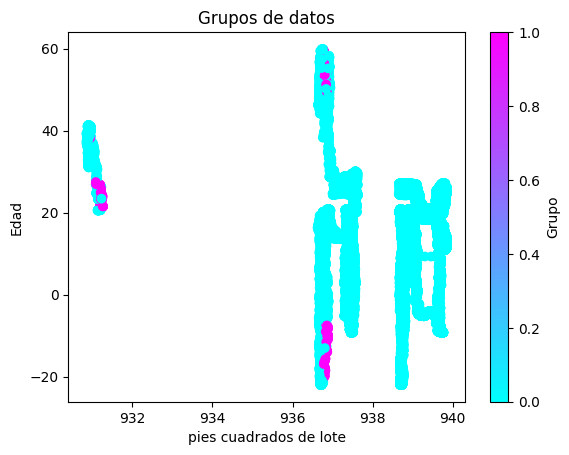

In [49]:
# Asumiendo que 'kmeans' es tu modelo KMeans ya ajustado
train_data['kmeans_3'] = kmeans.labels_

# Ahora puedes graficar los grupos
plt.scatter(train_data['Pressure[hPa]'], train_data['Temperature[C]'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('pies cuadrados de lote')
plt.ylabel('Edad')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

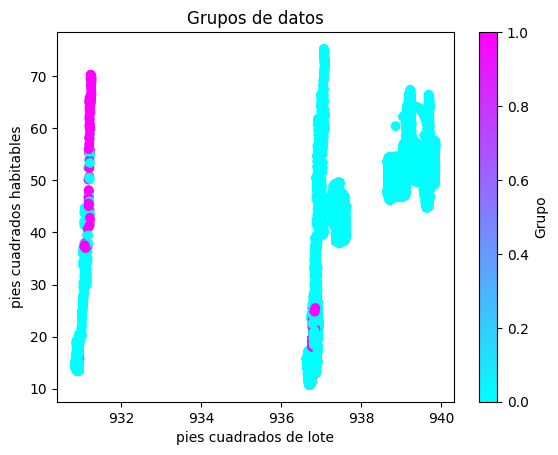

In [50]:
plt.scatter(train_data['Pressure[hPa]'], train_data['Humidity[%]'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('pies cuadrados de lote')
plt.ylabel('pies cuadrados habitables')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [51]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[1000]

# Convertir datos_nuevos a un DataFrame con los nombres de las columnas preservados
datos_nuevos_df = pd.DataFrame([datos_nuevos], columns=X_test.columns)

# Realizar la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict(datos_nuevos_df)

# Imprimir la predicción
print("Predicción:", prediccion)



Predicción: [0]
